# Import Library

In [165]:
import pandas as pd
import numpy as np

# data visualization library 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Analysis

In [167]:
covid_symptom = pd.read_csv('/content/drive/My Drive/SLDL/Covid_Dataset.csv')
covid_symptom

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [168]:
covid_symptom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [169]:
covid_symptom.describe(include='all')

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [170]:
covid_symptom.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

like we see our data is clean 0 missing values

# Data Vizualization

### COVID-19 (target)

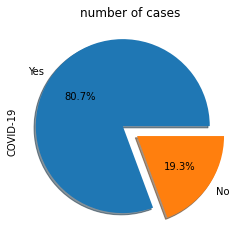

In [171]:
covid_symptom["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('number of cases');

# Feature Transformation

In [172]:
covid_symptom = covid_symptom.replace(to_replace=['No', 'Yes'], value=[0, 1])
covid_symptom

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
covid_symptom.describe(include='all')

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,...,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.0,5434.0,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,...,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416268,0.0,0.0,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,...,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.492984,0.0,0.0,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


# Feature Selection 

In [174]:
# both features are all the same value
covid_symptom = covid_symptom.drop('Wearing Masks',axis = 1)
covid_symptom = covid_symptom.drop('Sanitization from Market',axis = 1)

In [175]:
# correlation heatmap
corr=covid_symptom.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,0.040627


In [176]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split

# Get x, y
x=covid_symptom.drop('COVID-19',axis=1)
y=covid_symptom['COVID-19']

# Split x, y into testing and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.20)

# define feature selection
selector = SelectKBest(score_func=f_regression, k=15)
# apply feature selection
selector.fit(x_train, y_train)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

In [177]:
cols_name = selector.get_feature_names_out()
cols_name

array(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Asthma',
       'Chronic Lung Disease', 'Headache', 'Diabetes', 'Hyper Tension',
       'Fatigue ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places'], dtype=object)

In [178]:
# reshape 
x_train = x_train.iloc[:,cols]
x_test = x_test.iloc[:,cols]
x_valid = x_valid.iloc[:,cols]

# get final train data
final_y_train = np.concatenate((y_train, y_valid), axis = 0)
final_x_train = np.concatenate((x_train, x_valid), axis = 0)

# Machine Learning Algorithms

## Logistic Regression

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# find best C with training and validation data
bestC = 0
F1_score_best = 0
num = 0
for i in np.geomspace(0.0001, 1000, num=20):
    num += 1
    logreg = LogisticRegression(C = i, solver = 'newton-cg')
    logreg.fit(x_train, y_train)
    y_pred = logreg.predict(x_valid)
    f1_score_temp = metrics.f1_score(y_valid, y_pred)
    print("model", num, ":c = ", i ,"F1-score:", f1_score_temp, "")
    if f1_score_temp > F1_score_best:
        bestC = i
        F1_score_best = f1_score_temp
print("\nbestC =", bestC, ", F-1 Score = ", F1_score_best)

model 1 :c =  0.0001 F1-score: 0.8881789137380192 
model 2 :c =  0.00023357214690901214 F1-score: 0.8881789137380192 
model 3 :c =  0.000545559478116852 F1-score: 0.8881789137380192 
model 4 :c =  0.0012742749857031334 F1-score: 0.8881789137380192 
model 5 :c =  0.002976351441631319 F1-score: 0.9180977542932628 
model 6 :c =  0.0069519279617756054 F1-score: 0.9566414315209911 
model 7 :c =  0.01623776739188721 F1-score: 0.9740714786264892 
model 8 :c =  0.0379269019073225 F1-score: 0.9851169383416016 
model 9 :c =  0.08858667904100823 F1-score: 0.9807005003573981 
model 10 :c =  0.2069138081114788 F1-score: 0.9848812095032397 
model 11 :c =  0.4832930238571752 F1-score: 0.9855699855699855 
model 12 :c =  1.1288378916846884 F1-score: 0.9848375451263538 
model 13 :c =  2.6366508987303554 F1-score: 0.9855699855699855 
model 14 :c =  6.1584821106602545 F1-score: 0.9855699855699855 
model 15 :c =  14.38449888287663 F1-score: 0.9848594087959625 
model 16 :c =  33.59818286283781 F1-score: 0.9

In [181]:
# fit best model
logreg = LogisticRegression(C = bestC, solver = 'newton-cg')
logreg.fit(final_x_train, final_y_train)
y_pred = logreg.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [182]:
# testing data Accuracy, Precision, Recall, F-1 Score
logreg_f1_score = metrics.f1_score(y_test, y_pred)
logreg_accuracy = metrics.accuracy_score(y_test, y_pred)
logreg_Recall = metrics.recall_score(y_test, y_pred)
logreg_Precision = metrics.precision_score(y_test, y_pred)

print("F-1 Score:", logreg_f1_score)
print("Accuracy:", logreg_accuracy)
print("Recall:", logreg_Recall)
print("Precision", logreg_Precision)

F-1 Score: 0.977469670710572
Accuracy: 0.9641214351425943
Recall: 0.9712973593570609
Precision 0.9837209302325581


##  Random Forest Classifier

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# find best n_estimators with training and validation data
best_n_estimators = 0
F1_score_best = 0
num = 0
for i in np.geomspace(5, 1000, num=10).astype(int):
    num += 1
    clf = RandomForestClassifier(n_estimators = i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    f1_score_temp = metrics.f1_score(y_valid, y_pred)
    print("model", num, ":n_estimators = ", i ,"F1-score:", f1_score_temp, "")
    if f1_score_temp > F1_score_best:
        best_n_estimators = i
        F1_score_best = f1_score_temp
print("\nbest_n_estimators =", best_n_estimators, ", F-1 Score = ", F1_score_best)

model 1 :n_estimators =  5 F1-score: 0.9898403483309144 
model 2 :n_estimators =  9 F1-score: 0.9920347574221577 
model 3 :n_estimators =  16 F1-score: 0.9920347574221577 
model 4 :n_estimators =  29 F1-score: 0.9898403483309144 
model 5 :n_estimators =  52 F1-score: 0.9920347574221577 
model 6 :n_estimators =  94 F1-score: 0.9920347574221577 
model 7 :n_estimators =  170 F1-score: 0.9898403483309144 
model 8 :n_estimators =  308 F1-score: 0.9920347574221577 
model 9 :n_estimators =  555 F1-score: 0.9920347574221577 
model 10 :n_estimators =  1000 F1-score: 0.9920347574221577 

best_n_estimators = 9 , F-1 Score =  0.9920347574221577


In [184]:
# fit best model
clf = RandomForestClassifier(n_estimators = best_n_estimators)
clf.fit(final_x_train, final_y_train)
y_pred = clf.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [185]:
# testing data Accuracy, Precision, Recall, F-1 Score
RF_f1_score = metrics.f1_score(y_test, y_pred)
RF_accuracy = metrics.accuracy_score(y_test, y_pred)
RF_Recall = metrics.recall_score(y_test, y_pred)
RF_Precision = metrics.precision_score(y_test, y_pred)

print("F-1 Score:", RF_f1_score)
print("Accuracy:", RF_accuracy)
print("Recall:", RF_Recall)
print("Precision", RF_Precision)

F-1 Score: 0.9890363531448355
Accuracy: 0.9825206991720331
Recall: 0.983926521239954
Precision 0.994199535962877


## Gradient Boosting Classifier

model 1 :lr =  0.1 , best_nstg: 127 F1-score: 0.9927849927849927 
model 2 :lr =  0.5 , best_nstg: 26 F1-score: 0.9927849927849927 
model 3 :lr =  1 , best_nstg: 20 F1-score: 0.9935018050541518 


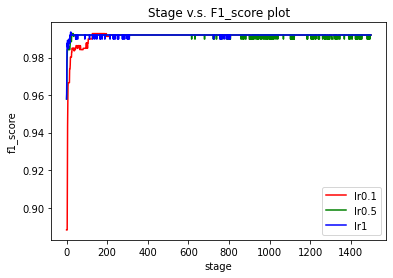


best_lr = 1 , best_nstg = 20 , F-1 Score =  0.9935018050541518


In [186]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import random

# find best lr, nstg with training and validation data
best_lr = 0
best_nstg = 0
F1_score_best = 0
num = 0
color = ["red", "green", "blue"]
for i in [0.1, 0.5, 1]:
    num += 1
    clf = GradientBoostingClassifier(n_estimators = 1500, learning_rate = i)
    clf.fit(x_train, y_train)
    f1_score_temp  = 0
    nstg = 0
    all_f1_score = []
    all_stage_num = []
    for stage, pred in enumerate(clf.staged_predict(x_valid)):
        f1_score_in = metrics.f1_score(y_valid, pred)
        all_f1_score.append(f1_score_in)
        all_stage_num.append(stage)
        if f1_score_temp < f1_score_in:
            f1_score_temp = f1_score_in
            nstg = stage
    
    rgb = [[random.random(), random.random(), random.random()]]
    plt.plot(all_stage_num, all_f1_score, color=color[num - 1], label="lr" + str(i))
    plt.xlabel('stage') # 設定 x 軸標題內容及大小
    plt.ylabel('f1_score') # 設定 y 軸標題內容及大小
    plt.title('Stage v.s. F1_score plot') # 設定圖表標題內容及大小
    
    print("model", num, ":lr = ", i, ", best_nstg:", nstg,"F1-score:", f1_score_temp, "")
    if f1_score_temp > F1_score_best:
        best_lr = i
        best_nstg = nstg
        F1_score_best = f1_score_temp
        
plt.legend()
plt.show()
print("\nbest_lr =", best_lr, ", best_nstg =", best_nstg, ", F-1 Score = ", F1_score_best)

In [187]:
# fit best model
clf = GradientBoostingClassifier(n_estimators = best_nstg, learning_rate = best_lr)
clf.fit(final_x_train, final_y_train)
y_pred = clf.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [188]:
# testing data Accuracy, Precision, Recall, F-1 Score
GBC_f1_score = metrics.f1_score(y_test, y_pred)
GBC_accuracy = metrics.accuracy_score(y_test, y_pred)
GBC_Recall = metrics.recall_score(y_test, y_pred)
GBC_Precision = metrics.precision_score(y_test, y_pred)

print("F-1 Score:", GBC_f1_score)
print("Accuracy:", GBC_accuracy)
print("Recall:", GBC_Recall)
print("Precision", GBC_Precision)

F-1 Score: 0.9890363531448355
Accuracy: 0.9825206991720331
Recall: 0.983926521239954
Precision 0.994199535962877


## KNeighborsClassifier

In [189]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# find best n_estimators with training and validation data
best_n_neighbors = 0
F1_score_best = 0
num = 0
for i in np.geomspace(2, 100, num=10).astype(int):
    num += 1
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    f1_score_temp = metrics.f1_score(y_valid, y_pred)
    print("model", num, ":n_neighbors = ", i ,"F1-score:", f1_score_temp, "")
    if f1_score_temp > F1_score_best:
        best_n_neighbors = i
        F1_score_best = f1_score_temp
print("\nbest_n_neighbors =", best_n_neighbors, ", F-1 Score = ", F1_score_best)

model 1 :n_neighbors =  2 F1-score: 0.9898403483309144 
model 2 :n_neighbors =  3 F1-score: 0.9898843930635838 
model 3 :n_neighbors =  4 F1-score: 0.9869565217391304 
model 4 :n_neighbors =  7 F1-score: 0.9876722262509064 
model 5 :n_neighbors =  11 F1-score: 0.9832970225127088 
model 6 :n_neighbors =  17 F1-score: 0.975254730713246 
model 7 :n_neighbors =  27 F1-score: 0.9739884393063584 
model 8 :n_neighbors =  41 F1-score: 0.9732851985559566 
model 9 :n_neighbors =  64 F1-score: 0.9815078236130867 
model 10 :n_neighbors =  100 F1-score: 0.9801136363636364 

best_n_neighbors = 3 , F-1 Score =  0.9898843930635838


In [190]:
# fit best model
clf = KNeighborsClassifier(n_neighbors = best_n_neighbors)
clf.fit(final_x_train, final_y_train)
y_pred = clf.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [191]:
# testing data Accuracy, Precision, Recall, F-1 Score
KNN_f1_score = metrics.f1_score(y_test, y_pred)
KNN_accuracy = metrics.accuracy_score(y_test, y_pred)
KNN_Recall = metrics.recall_score(y_test, y_pred)
KNN_Precision = metrics.precision_score(y_test, y_pred)

print("F-1 Score:", KNN_f1_score)
print("Accuracy:", KNN_accuracy)
print("Recall:", KNN_Recall)
print("Precision", KNN_Precision)

F-1 Score: 0.988479262672811
Accuracy: 0.9816007359705612
Recall: 0.9850746268656716
Precision 0.991907514450867


## DecisionTreeClassifier

In [192]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# fit model
clf = DecisionTreeClassifier(random_state=10)
clf.fit(final_x_train, final_y_train)
y_pred = clf.predict(x_test)

# testing data Accuracy, Precision, Recall, F-1 Score
DTC_f1_score = metrics.f1_score(y_test, y_pred)
DTC_accuracy = metrics.accuracy_score(y_test, y_pred)
DTC_Recall = metrics.recall_score(y_test, y_pred)
DTC_Precision = metrics.precision_score(y_test, y_pred)

print("F-1 Score:", DTC_f1_score)
print("Accuracy:", DTC_accuracy)
print("Recall:", DTC_Recall)
print("Precision", DTC_Precision)

F-1 Score: 0.9890363531448355
Accuracy: 0.9825206991720331
Recall: 0.983926521239954
Precision 0.994199535962877


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


## SVC

In [193]:
from sklearn import svm
from sklearn import metrics

# fit model
clf = svm.SVC()
clf.fit(final_x_train, final_y_train)
y_pred = clf.predict(x_test)

# testing data Accuracy, Precision, Recall, F-1 Score
SVC_f1_score = metrics.f1_score(y_test, y_pred)
SVC_accuracy = metrics.accuracy_score(y_test, y_pred)
SVC_Recall = metrics.recall_score(y_test, y_pred)
SVC_Precision = metrics.precision_score(y_test, y_pred)

print("F-1 Score:", SVC_f1_score)
print("Accuracy:", SVC_accuracy)
print("Recall:", SVC_Recall)
print("Precision", SVC_Precision)

F-1 Score: 0.9896432681242808
Accuracy: 0.983440662373505
Recall: 0.9873708381171068
Precision 0.9919261822376009


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


# Model Results

In [194]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Decision Tree Classifier', 'Gradient Boosting Classifier'],
    'Accuracy': [SVC_accuracy, KNN_accuracy, logreg_accuracy,
              RF_accuracy, DTC_accuracy, GBC_accuracy]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Support Vector Machines,0.983441
3,Random Forest,0.982521
4,Decision Tree Classifier,0.982521
5,Gradient Boosting Classifier,0.982521
1,KNN,0.981601
2,Logistic Regression,0.964121


In [195]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Decision Tree Classifier', 'Gradient Boosting Classifier'],
    'F1_Score': [SVC_f1_score, KNN_f1_score, logreg_f1_score,
              RF_f1_score, DTC_f1_score, GBC_f1_score]})
models.sort_values(by='F1_Score', ascending=False)

,Model,F1_Score
0,Support Vector Machines,0.989643
3,Random Forest,0.989036
4,Decision Tree Classifier,0.989036
5,Gradient Boosting Classifier,0.989036
1,KNN,0.988479
2,Logistic Regression,0.977470


In [196]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Decision Tree Classifier', 'Gradient Boosting Classifier'],
    'Recall': [SVC_Recall, KNN_Recall, logreg_Recall,
              RF_Recall, DTC_Recall, GBC_Recall]})
models.sort_values(by='Recall', ascending=False)

,Model,Recall
0,Support Vector Machines,0.987371
1,KNN,0.985075
3,Random Forest,0.983927
4,Decision Tree Classifier,0.983927
5,Gradient Boosting Classifier,0.983927
2,Logistic Regression,0.971297


In [197]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Decision Tree Classifier', 'Gradient Boosting Classifier'],
    'Precision': [SVC_Precision, KNN_Precision, logreg_Precision,
              RF_Precision, DTC_Precision, GBC_Precision]})
models.sort_values(by='Precision', ascending=False)

,Model,Precision
3,Random Forest,0.994200
4,Decision Tree Classifier,0.994200
5,Gradient Boosting Classifier,0.994200
0,Support Vector Machines,0.991926
1,KNN,0.991908
2,Logistic Regression,0.983721
